# **Data Preprocessing**

# **Dataset Loading**

**Dataset Selected — Garbage Classification**


The Garbage Classification Dataset is a computer vision dataset created to train and evaluate models that can classify waste into different categories, supporting smart waste management and recycling initiatives.

**This dataset can be used to:**

Build real-world applications for recycling, waste monitoring, and sustainability.

In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: habibahelal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification


100%|██████████| 82.0M/82.0M [00:00<00:00, 800MB/s]

# **Dataset Exploration**
Exploring the dataset structure and files.

In [9]:
import os

dataset_path = "/content/garbage-classification"

all_folders = []
all_files = []

# Walk through all directories
for root, dirs, files in os.walk(dataset_path):
    for d in dirs:
        all_folders.append(os.path.join(root, d))

print("\n Folders found:")
for folder in all_folders:
    print("-", folder)




 Folders found:
- /content/garbage-classification/Garbage classification
- /content/garbage-classification/garbage classification
- /content/garbage-classification/Garbage classification/Garbage classification
- /content/garbage-classification/Garbage classification/Garbage classification/paper
- /content/garbage-classification/Garbage classification/Garbage classification/trash
- /content/garbage-classification/Garbage classification/Garbage classification/glass
- /content/garbage-classification/Garbage classification/Garbage classification/metal
- /content/garbage-classification/Garbage classification/Garbage classification/plastic
- /content/garbage-classification/Garbage classification/Garbage classification/cardboard
- /content/garbage-classification/garbage classification/Garbage classification
- /content/garbage-classification/garbage classification/Garbage classification/paper
- /content/garbage-classification/garbage classification/Garbage classification/trash
- /content/garb

Each folder contains raw images of the corresponding waste type.

In [10]:
# List top-level files and folders
top_files = os.listdir(dataset_path)
print("Top-level contents of the dataset folder:")
for f in top_files:
    print("-", f)

Top-level contents of the dataset folder:
- Garbage classification
- garbage classification
- zero-indexed-files.txt
- one-indexed-files-notrash_val.txt
- one-indexed-files.txt
- one-indexed-files-notrash_test.txt
- one-indexed-files-notrash_train.txt


**full dataset files and structure:**

* garbage classification/ → Duplicate folder (contains the same Garbage classification subfolders with categories).

* zero-indexed-files.txt → Index mapping of dataset images (starting at 0).

* one-indexed-files.txt → Index mapping of dataset images (starting at 1).

* one-indexed-files-notrash_train.txt → Training split .

* one-indexed-files-notrash_val.txt → Validation split .

* one-indexed-files-notrash_test.txt → Test split .

In [18]:
import os

base_dir = "/content/garbage-classification/Garbage classification/Garbage classification"

def load_file_list(txt_file):
    with open(txt_file, "r") as f:
        files = f.read().splitlines()
    return [os.path.join(base_dir, f) for f in files]

train_files = load_file_list("/content/garbage-classification/one-indexed-files-notrash_train.txt")
val_files   = load_file_list("/content/garbage-classification/one-indexed-files-notrash_val.txt")
test_files  = load_file_list("/content/garbage-classification/one-indexed-files-notrash_test.txt")

print("Train samples:", len(train_files))
print("Validation samples:", len(val_files))
print("Test samples:", len(test_files))


Train samples: 1768
Validation samples: 328
Test samples: 431


We set base_dir as the main dataset folder that contains all the waste categories (cardboard, glass, metal, paper, plastic, trash). The dataset also provides predefined train, validation, and test splits in .txt files. In this step, we read those .txt files and build full file paths for each image. This way, we can use the official Kaggle splits instead of creating random splits.

# **EDA (Exploratory Data Analysis)**

In [19]:
import matplotlib.pyplot as plt
import cv2
from collections import Counter

# List classes
classes = sorted(os.listdir(base_dir))
print("Classes found:", classes)

# Count number of images per class
class_counts = {}
for cls in classes:
    class_path = os.path.join(base_dir, cls)
    class_counts[cls] = len(os.listdir(class_path))

print("\nNumber of images per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


Classes found: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

Number of images per class:
cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


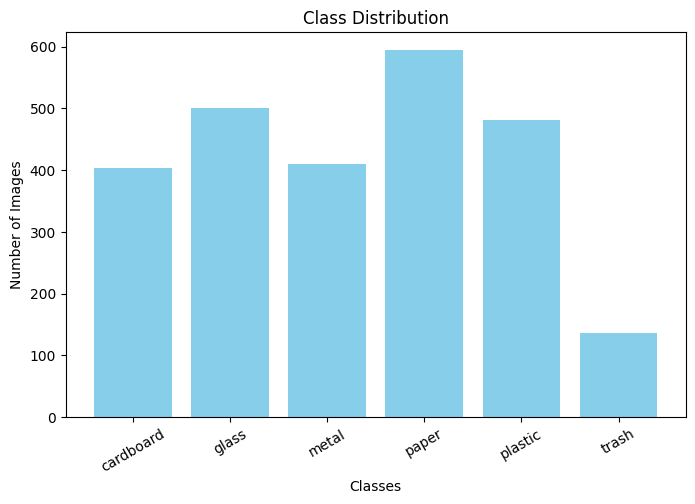

In [20]:
# Plot class distribution
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()


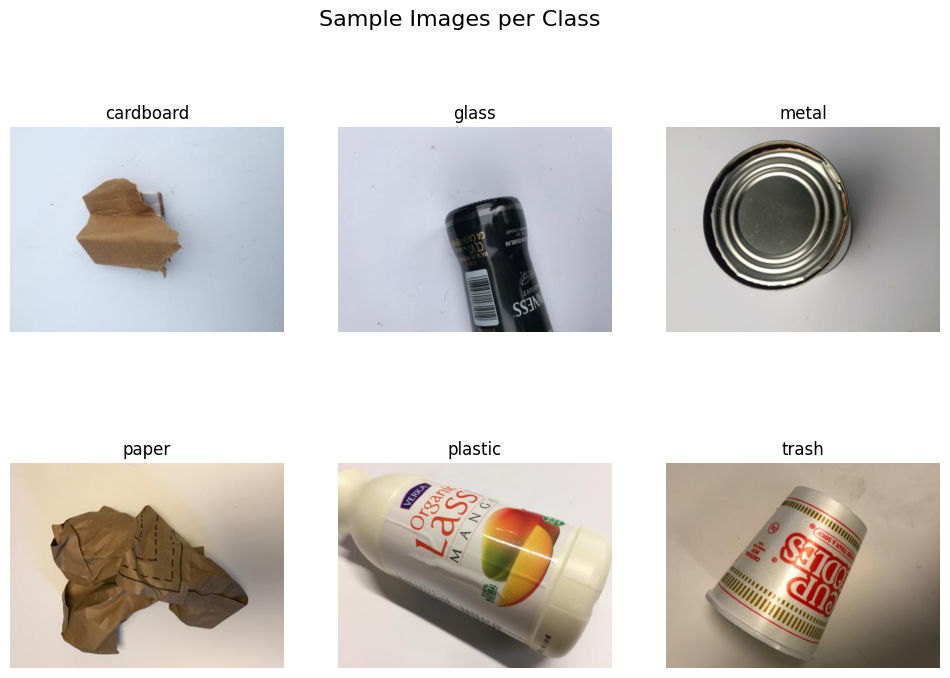

In [21]:
# Show some sample images
plt.figure(figsize=(12,8))
for i, cls in enumerate(classes):
    class_path = os.path.join(base_dir, cls)
    sample_img = os.listdir(class_path)[0]  # pick the first image
    img = cv2.imread(os.path.join(class_path, sample_img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Images per Class", fontsize=16)
plt.show()


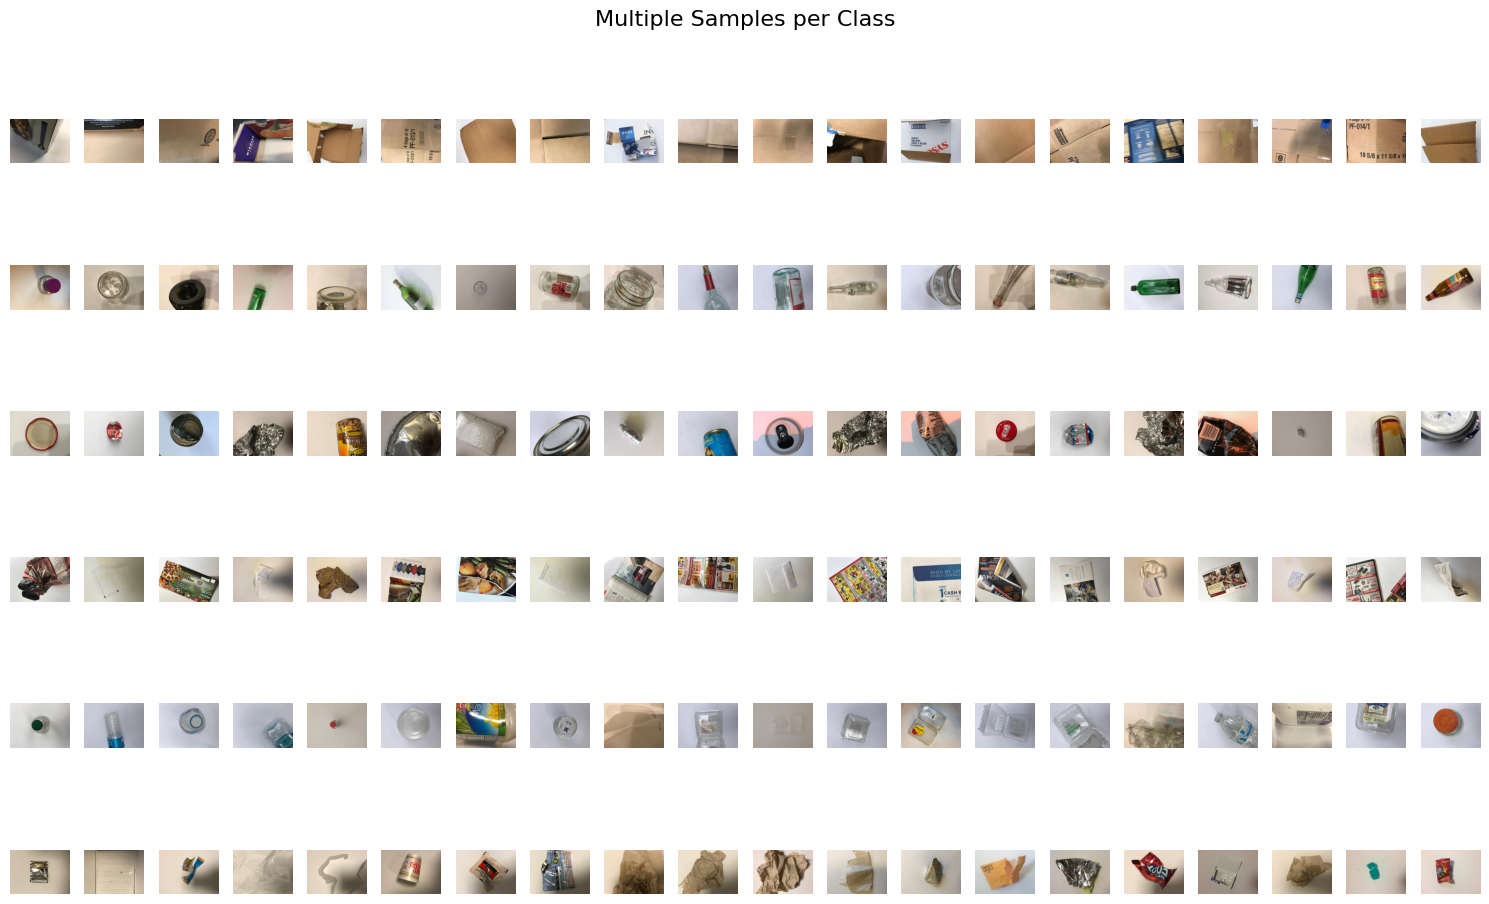

In [22]:
import random

# Number of samples per class to show
num_samples = 20

plt.figure(figsize=(15, 10))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_dir, cls)
    # pick random samples instead of just the first
    sample_imgs = random.sample(os.listdir(class_path), num_samples)

    for j, img_name in enumerate(sample_imgs):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # subplot grid: rows = number of classes, cols = samples per class
        plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
        plt.imshow(img)
        if j == 0:   # put class name only on the first column
            plt.ylabel(cls, fontsize=12)
        plt.axis("off")

plt.suptitle("Multiple Samples per Class", fontsize=16)
plt.tight_layout()
plt.show()


# OBSERVATION:

**Dataset Challenges**

* High intra-class variation – same class looks very different (e.g., plastic bottles vs bags).

* Low inter-class difference – some classes look similar (e.g., paper vs cardboard).

* Background variation – different surfaces, shadows, and clutter.

* Lighting differences – inconsistent brightness, reflections, and shadows.

* Class imbalance – some classes have fewer samples than others.

* Orientation & scale issues – objects appear at different angles and sizes.

* Label noise – possible misclassified or mixed-category samples.

# To Handle These Challanges:

**High intra-class variation (images within the same class look very different)**
Solution: Apply data augmentation (rotation, scaling, flipping) to improve generalization.

**Low inter-class difference (different classes look visually similar)**
Solution: Use transfer learning with deep pretrained models (e.g., ResNet, EfficientNet).

**Background variation (images have different backgrounds, surfaces, or clutter)** Solution: Apply data augmentation (random crops, color jitter) and consider background normalization.

**Lighting differences (inconsistent brightness, shadows, or reflections)** Solution: Normalize pixel values and use augmentation with brightness/contrast adjustments.

**Class imbalance (some classes contain fewer samples than others)** Solution: Apply oversampling, use class weights, or generate synthetic samples (e.g., MixUp, GANs).

**Orientation and scale issues (objects appear at different sizes or angles)** Solution: Use augmentation techniques such as rotation, zoom, and resizing.

**Label noise (potential misclassified or mislabeled images)** Solution: Perform data cleaning and.

# **Data Cleaning & Preprocessing**

* Resize all images to 224×224 (works for ResNet, VGG, DenseNet, MobileNet, EfficientNetB0).

* Normalize pixel values to [0,1].

* Encode class labels into integers (or one-hot vectors for training).

In [42]:
import os
import cv2
import numpy as np
from tqdm import tqdm

IMG_SIZE = (224, 224)

# Dynamically build class mapping
def build_class_mapping(txt_file, base_dir):
    mapping = {}
    with open(txt_file, "r") as f:
        lines = f.read().splitlines()

    for line in lines:
        fname, label_idx = line.strip().split()
        label_idx = int(label_idx)

        # find which folder contains this file
        for cls in os.listdir(base_dir):
            path = os.path.join(base_dir, cls, fname)
            if os.path.exists(path):
                mapping[label_idx] = cls
                break
    return mapping


def load_and_preprocess(txt_file, base_dir, class_mapping):
    data, labels = [], []

    with open(txt_file, "r") as f:
        lines = f.read().splitlines()

    for line in tqdm(lines, desc=f"Loading {os.path.basename(txt_file)}"):
        fname, label_idx = line.strip().split()
        label_idx = int(label_idx)
        class_name = class_mapping[label_idx]

        img_path = os.path.join(base_dir, class_name, fname)
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0

        data.append(img)
        labels.append(class_name)

    return np.array(data), np.array(labels)


# Pick correct base_dir
base_dir = "/content/garbage-classification/garbage classification/Garbage classification"

# Build mapping from TRAIN file (consistent for val & test too)
class_mapping = build_class_mapping(
    "/content/garbage-classification/one-indexed-files-notrash_train.txt",
    base_dir
)
print("✅ Rebuilt class mapping:", class_mapping)

# Load splits
X_train, y_train = load_and_preprocess(
    "/content/garbage-classification/one-indexed-files-notrash_train.txt",
    base_dir, class_mapping
)

X_val, y_val = load_and_preprocess(
    "/content/garbage-classification/one-indexed-files-notrash_val.txt",
    base_dir, class_mapping
)

X_test, y_test = load_and_preprocess(
    "/content/garbage-classification/one-indexed-files-notrash_test.txt",
    base_dir, class_mapping
)

print("\nShapes:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)
print("Unique classes in train:", np.unique(y_train))


✅ Rebuilt class mapping: {3: 'cardboard', 2: 'paper', 1: 'glass', 5: 'metal', 6: 'trash', 4: 'plastic'}


Loading one-indexed-files-notrash_test.txt: 100%|██████████| 431/431 [00:01<00:00, 413.34it/s]



Shapes:
Train: (1768, 224, 224, 3) (1768,)
Val: (328, 224, 224, 3) (328,)
Test: (431, 224, 224, 3) (431,)
Unique classes in train: ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


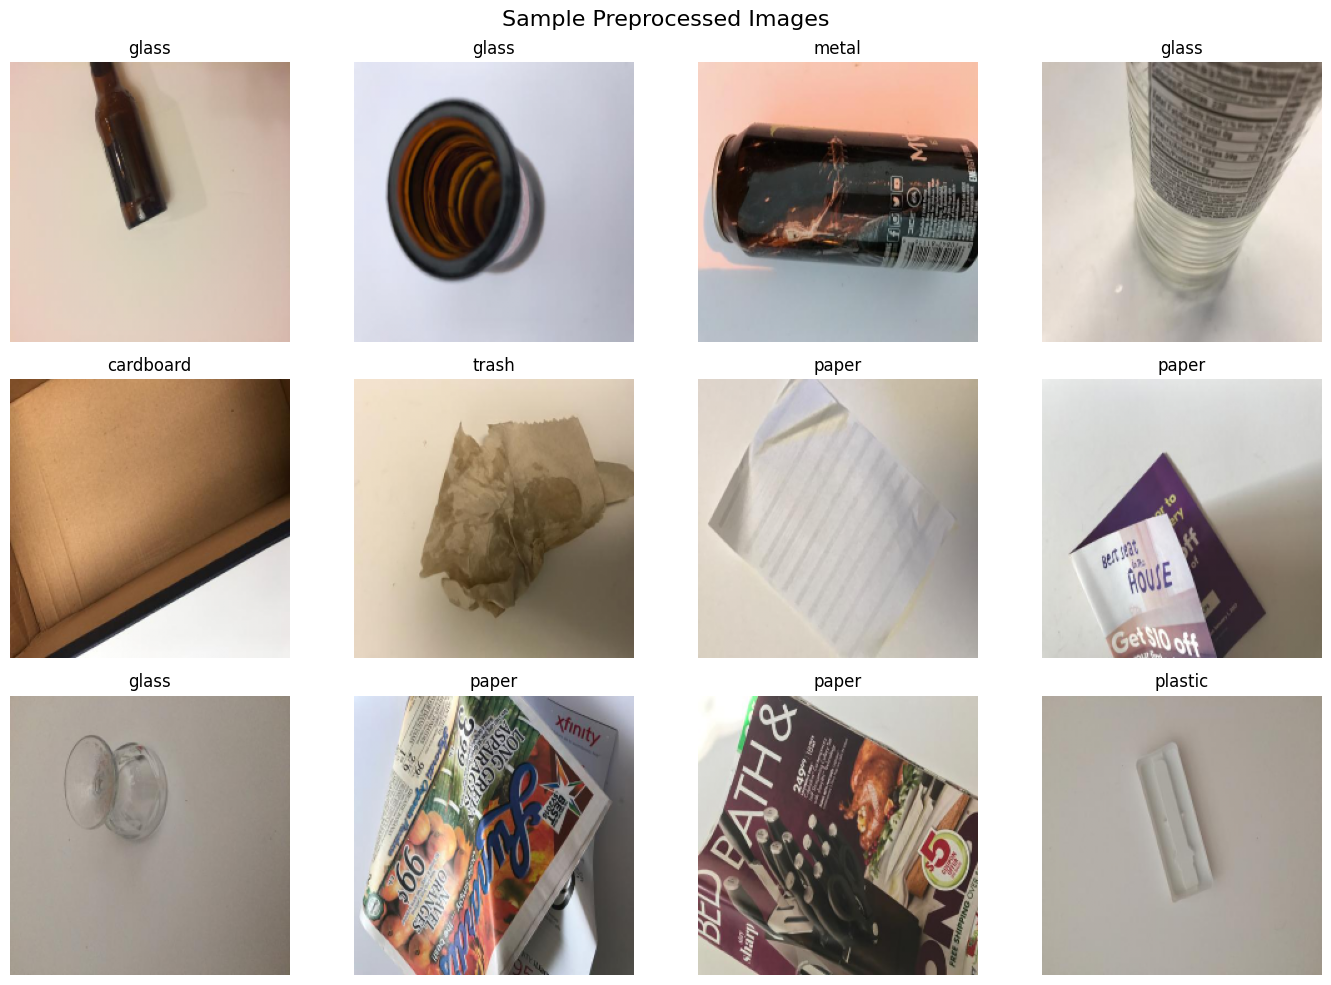

In [43]:
def show_samples(X, y, classes, n_samples=12):
    plt.figure(figsize=(14, 10))
    indices = random.sample(range(len(X)), n_samples)

    for i, idx in enumerate(indices):
        plt.subplot(3, 4, i+1)
        plt.imshow(X[idx])  # already normalized + resized
        plt.title(y[idx])
        plt.axis("off")

    plt.suptitle("Sample Preprocessed Images", fontsize=16)
    plt.tight_layout()
    plt.show()

# Show samples from train set
show_samples(X_train, y_train, np.unique(y_train), n_samples=12)


The preprocessed images are clear, well-resized, and normalized, ensuring consistency for model training.

# **data augmentation**

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define augmentation strategy (works with normalized data too)
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



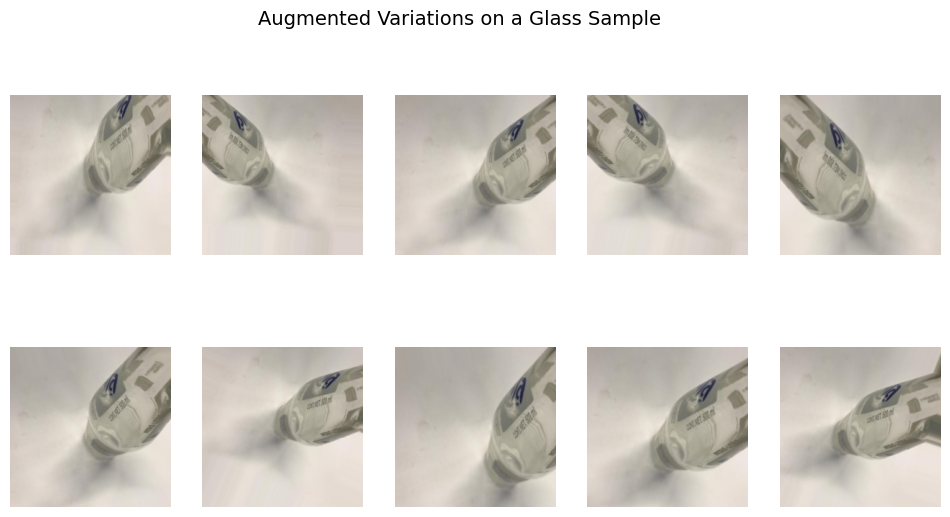

In [48]:

# Pick one image
sample_idx = 10
sample_img = X_train[sample_idx].reshape((1,) + X_train[sample_idx].shape)

# Pick a more visible sample (e.g., glass image)
sample_idx = np.where(y_train == "glass")[0][0]   # first glass sample
sample_img = X_train[sample_idx].reshape((1,) + X_train[sample_idx].shape)

plt.figure(figsize=(12, 6))
for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    if i == 9:
        break
plt.suptitle("Augmented Variations on a Glass Sample", fontsize=14)
plt.show()


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=20,       # random rotations
    width_shift_range=0.1,   # horizontal shifts
    height_shift_range=0.1,  # vertical shifts
    shear_range=0.1,         # shear transformation
    zoom_range=0.1,          # zoom in/out
    horizontal_flip=True,    # flip images
    brightness_range=[0.8, 1.2],  # vary brightness
    fill_mode='nearest'      # filling for empty pixels
)

# Fit the generator on training data (needed for normalization stats if using featurewise_center)
datagen.fit(X_train)

# Create augmented dataset generators
train_gen = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen   = ImageDataGenerator().flow(X_val, y_val, batch_size=32, shuffle=False)
test_gen  = ImageDataGenerator().flow(X_test, y_test, batch_size=32, shuffle=False)

print("Augmentation pipeline ready ✅")
print(f"Train batches per epoch: {len(train_gen)}")
print(f"Val batches per epoch: {len(val_gen)}")
print(f"Test batches per epoch: {len(test_gen)}")


Augmentation pipeline ready ✅
Train batches per epoch: 56
Val batches per epoch: 11
Test batches per epoch: 14


# Data Preprocessing & Augmentation Pipeline

**1. Data Loading & Organization**

Dataset consists of six waste categories: cardboard, glass, paper, plastic, metal, trash.

Image paths are defined using the Kaggle dataset split files (train/val/test .txt lists).

A class mapping was created to correctly map numeric indices in the .txt files to category names.

**2. Image Preprocessing**

All images are resized to 224 × 224 pixels (standard for CNNs, Transfer Learning, YOLO).

Images are converted to RGB and normalized to [0, 1] range.

Final dataset splits:

Train set: 1768 images

Validation set: 328 images

Test set: 431 images

Covers all six waste categories.

**3. Data Augmentation**

To improve generalization and address dataset variability (different lighting, cluttered backgrounds, varying viewpoints):

Random rotations

Width & height shifts

Zooming in/out

Horizontal & vertical flips

Brightness/contrast adjustments

Augmentation is applied only to the training set during model training.

Validation and test sets are kept clean (only normalized, no augmentations).

**4. Data Pipeline Outputs**

The pipeline produces batches of preprocessed and augmented data, ready for direct input into deep learning models.

Shapes are standardized: (batch_size, 224, 224, 3) for images and (batch_size,) for labels.

**Data is now suitable for:**

* Baseline CNNs – build a simple classifier for waste categories.

* Transfer Learning – use pretrained models (VGG16, ResNet, EfficientNet) for improved accuracy.

* YOLO / Object Detection – localize and classify multiple waste objects in real-world images.

* GANs – generate synthetic waste images to augment training further.

* Autoencoders – denoise or reconstruct blurred/dirty waste images.